In [11]:
from modules.data import load_dataset , view_random_images , augment_dataset , get_split_stats , create_stratified_split
from modules.preprocessing import preprocess_image
from modules.feature_extraction import extract_features

import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# stored variables are:
# %store -r images
# %store -r labels
# %store -r augmented_images
# %store -r augmented_labels
# %store -r train_images
# %store -r train_labels
# %store -r test_images
# %store -r test_labels
# %store -r val_images
# %store -r val_labels


%store -r

DataSet Size : 1821


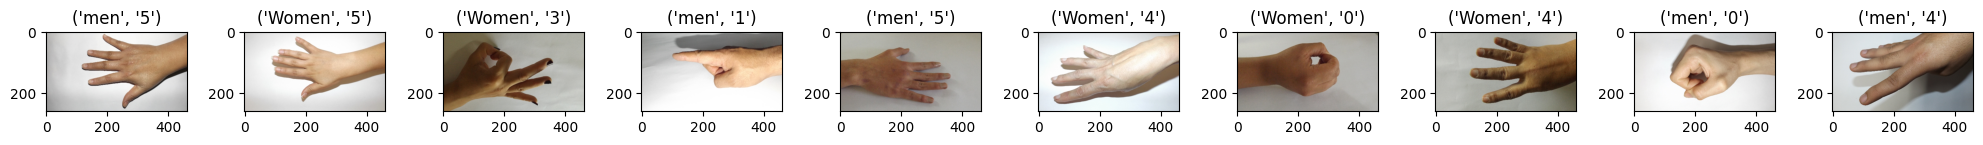

In [2]:
#Load the dataset and view some random images

# images , labels = load_dataset('dataset')
# %store images
# %store labels

print("DataSet Size :" , len(images))
assert len(images) == len(labels) , "Images and labels are not of the same size"
view_random_images(images, labels , num_images=10)

Augmented DataSet Size : 679


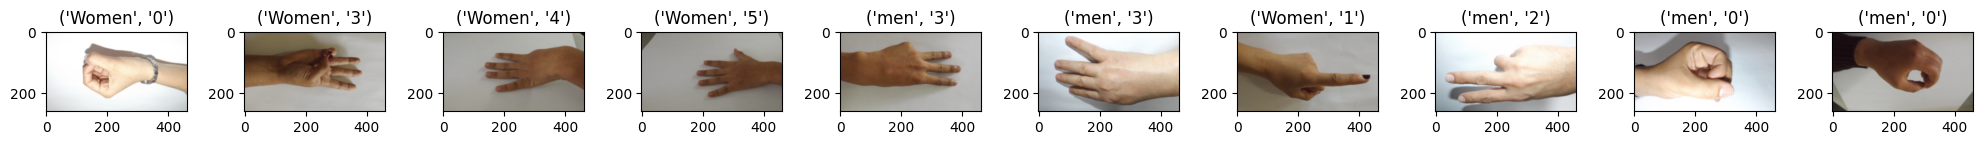

In [3]:
#Augment the dataset and view some random images

# augmented_images , augmented_labels = augment_dataset(images, labels , num_images=679)
# %store augmented_images
# %store augmented_labels

print("Augmented DataSet Size :" , len(augmented_images))
assert len(augmented_images) == len(augmented_labels) , "Images and labels of augmented Dataset are not of the same size"
view_random_images(augmented_images, augmented_labels , num_images=10)

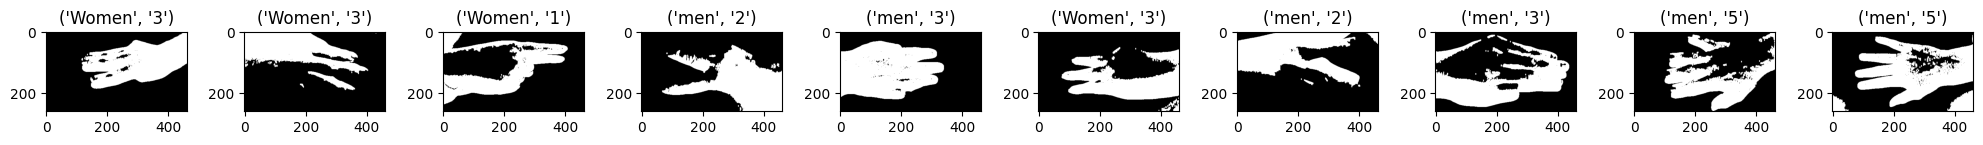

In [4]:
#preprocess the images and store them in place
for i in range(len(images)):
    images[i] = preprocess_image(images[i])
#view some random images
view_random_images(images, labels , num_images=10)

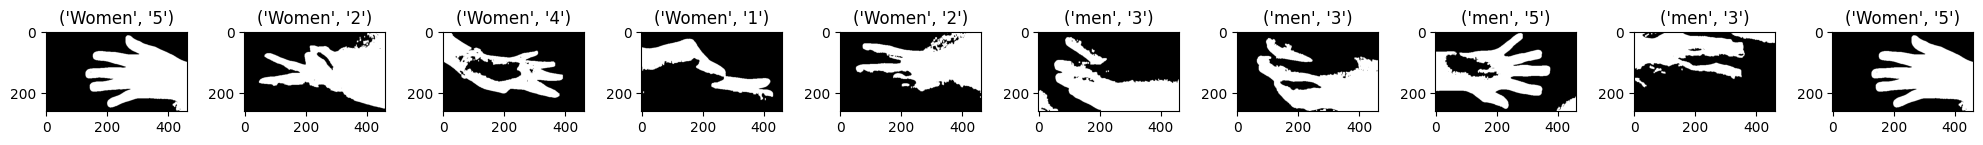

In [5]:
#preprocess the augmented images and store them in place
for i in range(len(augmented_images)):
    augmented_images[i] = preprocess_image(augmented_images[i])

view_random_images(augmented_images, augmented_labels , num_images=10)

In [6]:
# train_images, train_labels, test_images, test_labels, val_images, val_labels = create_stratified_split(images= images , labels= labels , test_size=0.1, val_size=0.1)
# %store train_images
# %store train_labels
# %store test_images
# %store test_labels
# %store val_images
# %store val_labels

print("Train Set Size :" , len(train_images))
print("Test Set Size :" , len(test_images))
print("Val Set Size :" , len(val_images))

Train Set Size : 1508
Test Set Size : 158
Val Set Size : 155


In [7]:
get_split_stats(train_labels, test_labels, val_labels)

+Train Set----+-----+-------+
| class_count | Men | Women |
+-------------+-----+-------+
| 0           | 144 | 96    |
| 1           | 139 | 104   |
| 2           | 146 | 107   |
| 3           | 154 | 113   |
| 4           | 141 | 101   |
| 5           | 151 | 112   |
+-------------+-----+-------+
+Test Set-----+-----+-------+
| class_count | Men | Women |
+-------------+-----+-------+
| 0           | 14  | 8     |
| 1           | 20  | 13    |
| 2           | 14  | 13    |
| 3           | 11  | 12    |
| 4           | 10  | 20    |
| 5           | 13  | 10    |
+-------------+-----+-------+
+Val Set------+-----+-------+
| class_count | Men | Women |
+-------------+-----+-------+
| 0           | 14  | 11    |
| 1           | 16  | 8     |
| 2           | 15  | 13    |
| 3           | 15  | 11    |
| 4           | 17  | 12    |
| 5           | 13  | 10    |
+-------------+-----+-------+


In [8]:
#all augmented images are used for training
train_images.extend(augmented_images)
train_labels.extend(augmented_labels)

In [9]:
print("Train Set Size :" , len(train_images))
assert len(train_images) == len(train_labels) , "Images and labels of train Dataset are not of the same size"

Train Set Size : 2187


In [17]:
#extract features from the train images

# train_features = np.array([])
# for image in train_images:
#     features = ExtractFeatures(image)
#     if train_features.size == 0:
#         train_features = features
#     else:
#         train_features = np.hstack((train_features, features))

# print("Train Features Shape :" , train_features.shape)

train_features = np.array([])
features0 = extract_features(train_images[0])
features1 = extract_features(train_images[0])

train_features = np.vstack((features0,features1))

print("Train Features Shape :" , train_features.shape)

Train Features Shape : (2, 105300)


In [ ]:
#extract features from the test images
test_features = np.array([])
for image in test_images:
    features = ExtractFeatures(image)
    if test_features.size == 0:
        test_features = features
    else:
        test_features = np.hstack((test_features, features))

In [ ]:
from modules.models import svm_model
svm_model(train_features, train_labels, test_images, test_labels)